In [26]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from scipy import stats
import statsmodels.api as sm
import tqdm
import os

from docx import Document
from docx.shared import Inches

import utils, iterative_algorithm


### Defining the data used

In [27]:
predictive_processing_dataset = pd.read_excel("All_Features_dataset.xlsx")
scales = pd.read_excel("filled_scales_BEBRASK_RETOS.xlsx")
scales.drop(["SUBJECT_CODE","Age"],axis=1,inplace=True)

common_values = scales['EPRIME_CODE'].unique()
predictive_processing_dataset = predictive_processing_dataset[predictive_processing_dataset['Subject'].isin(common_values)]
metrics_columns = scales.drop("EPRIME_CODE",axis=1).columns.values
predictive_processing_columns = predictive_processing_dataset.drop("Subject",axis=1).columns.values
feature_scales = pd.merge(left = predictive_processing_dataset,right=scales, left_on="Subject",right_on="EPRIME_CODE").drop(["EPRIME_CODE","Subject"],axis=1)


specific_features = ["Mean_Rating0","Mean_Rating0_Match","Mean_Rating0_No_Match","Dif_Match","Cor_Pred_Like","Cor_Pred_Like_Match","Cor_Pred_Like_No_Match","Mean_Rating0_Match_Negative","Mean_Rating0_No_Match_Negative","Dif_Negative","Trend_Match","Trend_No_Match",
    "Trend_No_Match_Negative", "Trend_Match_Negative",
    "Cor_Pred_Like_Match_Negative", "Cor_Pred_Like_No_Match_Negative","Mean_Rating0_Match_Happy","Mean_Rating0_No_Match_Happy","Dif_Happy",
    "Trend_No_Match_Happy", "Trend_Match_Happy",
    "Cor_Pred_Like_Match_Happy", "Cor_Pred_Like_No_Match_Happy","Cor_Pred_Like_Negative","Mean_Rating0_Negative","Cor_Pred_Like_Happy","Mean_Rating0_Happy"
]

### Algorithm

In [28]:
np.random.seed(42)  # For reproducibility
features = specific_features  # Assuming 'specific_features' is defined elsewhere
initial_combinations = iterative_algorithm.generate_initial_combinations(features, 50)
initial_results = iterative_algorithm.initial_iteration(initial_combinations, feature_scales.copy(), metrics_columns)
final_results = iterative_algorithm.perform_iterations(initial_results[:20], feature_scales.copy(), metrics_columns, features, add_count = True, min_samples = 8, num_iterations=2)


for res, clusters in final_results:
    print(f"Feature Pathway for Cluster:")
    # Iterate through each step in the lineage and print
    for step in res['lineage']:
        print(f"  - Feature: {step[0]['feature']} at Percentile: {step[0]['percentile']}")
    print(f"Significant Counts: {res['significant_counts']}, Mean P-Value: {res['mean_p_value']:.4f}")


Feature Pathway for Cluster:
  - Feature: Trend_No_Match_Happy at Percentile: 60
  - Feature: Dif_Match at Percentile: 80
  - Feature: Cor_Pred_Like_Match_Happy at Percentile: 30
Significant Counts: 28, Mean P-Value: 0.0256
Feature Pathway for Cluster:
  - Feature: Dif_Happy at Percentile: 75
  - Feature: Trend_Match_Negative at Percentile: 35
  - Feature: Trend_No_Match at Percentile: 55
Significant Counts: 26, Mean P-Value: 0.0226
Feature Pathway for Cluster:
  - Feature: Trend_No_Match_Happy at Percentile: 60
  - Feature: Dif_Match at Percentile: 80
  - Feature: Cor_Pred_Like_Match_Happy at Percentile: 25
Significant Counts: 26, Mean P-Value: 0.0239
Feature Pathway for Cluster:
  - Feature: Trend_Match_Negative at Percentile: 35
  - Feature: Dif_Happy at Percentile: 75
  - Feature: Dif_Negative at Percentile: 60
Significant Counts: 26, Mean P-Value: 0.0254
Feature Pathway for Cluster:
  - Feature: Trend_No_Match_Happy at Percentile: 60
  - Feature: Dif_Match at Percentile: 80
  - Fe

#### Visualizing best results

In [30]:
iterative_algorithm.analyze_top_configurations(final_results, feature_scales.copy(), metrics_columns)


Configuration: Initial Feature=Trend_No_Match_Happy, Percentile=60, New Feature=Cor_Pred_Like_Match_Happy, New Percentile=30
Cluster Sizes:
  AA: 27
  AB: 11
  BAA: 14
  BAB: 11
  BBA: 63
  BBB: 23
Metric Means Across Clusters:
  PA: AA: 32.5926, AB: 31.0000, BAA: 34.7857, BAB: 38.8182, BBA: 33.0635, BBB: 31.9565
  NA.: AA: 19.3704, AB: 20.3636, BAA: 18.7857, BAB: 20.0909, BBA: 20.3651, BBB: 21.9565
  ERQ_CR: AA: 4.8520, AB: 4.5609, BAA: 5.2850, BAB: 5.4394, BBA: 4.8758, BBB: 4.6448
  ERQ_ES: AA: 3.4444, AB: 2.8864, BAA: 2.0179, BAB: 3.2045, BBA: 2.9008, BBB: 3.5217
  UPPSP_NU: AA: 8.6667, AB: 8.0000, BAA: 7.4286, BAB: 8.5455, BBA: 9.2540, BBB: 9.6087
  UPPSP_PU: AA: 9.7778, AB: 9.6364, BAA: 9.5000, BAB: 9.3636, BBA: 10.1111, BBB: 9.7826
  UPPSP_SS: AA: 11.7407, AB: 9.7273, BAA: 11.6429, BAB: 12.5455, BBA: 10.2381, BBB: 10.7391
  UPPSP_PMD: AA: 7.2963, AB: 7.9091, BAA: 7.3571, BAB: 5.7273, BBA: 7.7207, BBB: 7.2609
  UPPSP_PSV: AA: 7.5556, AB: 7.4545, BAA: 6.3571, BAB: 4.2727, BBA: 7.2

#### Creating Word with boxplots and tables


In [33]:
utils.create_word_configurations(final_results, feature_scales.copy(), metrics_columns,"Testing2.docx")

### Fast Clusters Testing

In [51]:
clusters_features = ["Mean_Rating0", "Mean_Rating0_Match", "Mean_Rating0_No_Match", "Dif_Match", "Cor_Pred_Like",
                     "Cor_Pred_Like_Match", "Cor_Pred_Like_No_Match", "Mean_Rating0_Match_Negative",
                     "Mean_Rating0_No_Match_Negative", "Dif_Negative", "Trend_Match", "Trend_No_Match",
                     "Trend_No_Match_Negative", "Trend_Match_Negative",
                     "Cor_Pred_Like_Match_Negative", "Cor_Pred_Like_No_Match_Negative", "Mean_Rating0_Match_Happy",
                     "Mean_Rating0_No_Match_Happy", "Dif_Happy",
                     "Trend_No_Match_Happy", "Trend_Match_Happy",
                     "Cor_Pred_Like_Match_Happy", "Cor_Pred_Like_No_Match_Happy", "Cor_Pred_Like_Negative",
                     "Mean_Rating0_Negative", "Cor_Pred_Like_Happy", "Mean_Rating0_Happy","PA", "UPPSP_PSV"
                     ]
cluster_data = feature_scales[["PA", "UPPSP_PSV"]]

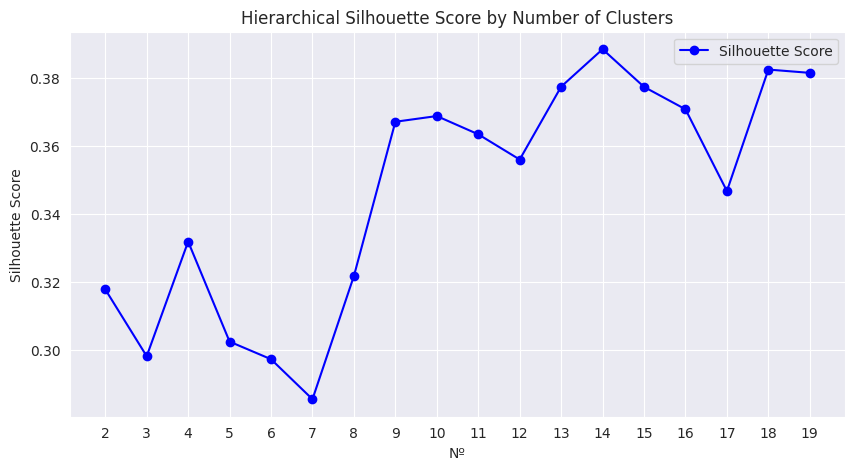

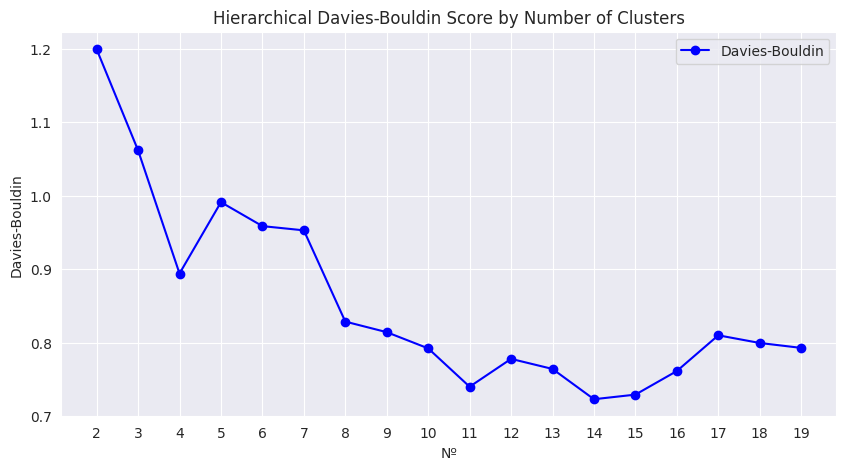

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import AgglomerativeClustering
import predictive_plots,predictive_clustering,utils

scaler = StandardScaler()
scaler.fit(cluster_data)
normalized_data = scaler.transform(cluster_data)
silhouette = []
db = []


for n in range(2,20):
    data_clusters = predictive_clustering.clustering(normalized_data,AgglomerativeClustering,{'n_clusters':n,'linkage':"complete"},fit=True)
    silhouette.append(silhouette_score(normalized_data, data_clusters))
    db.append(davies_bouldin_score(normalized_data, data_clusters))

cluster_range = range(2, 20)
label = 'Silhouette Score'
title = 'Hierarchical Silhouette Score by Number of Clusters'
predictive_plots.metrics_plot(cluster_range, silhouette, label, title)

cluster_range = range(2, 20)
label = 'Davies-Bouldin'
title = 'Hierarchical Davies-Bouldin Score by Number of Clusters'
predictive_plots.metrics_plot(cluster_range, db, label, title)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


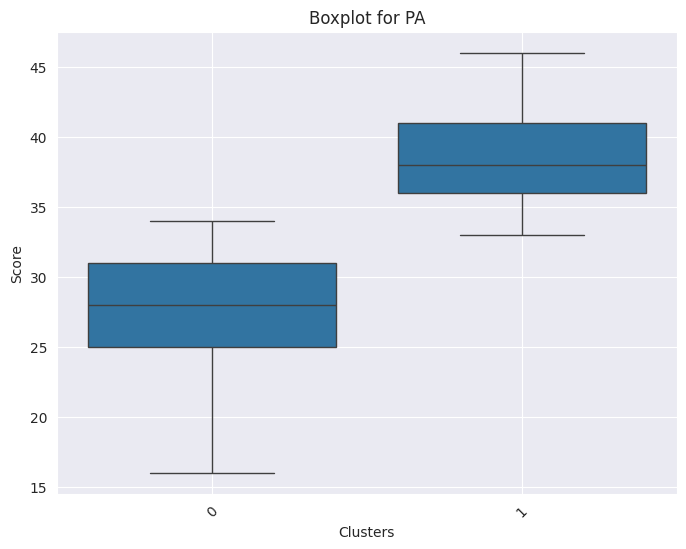

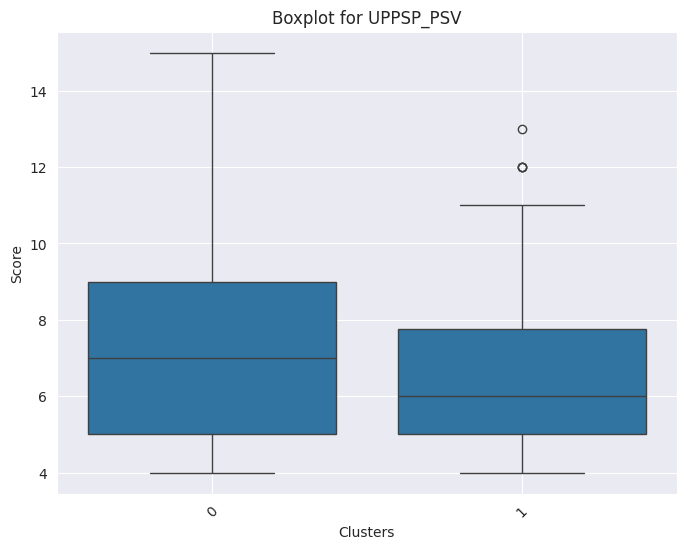

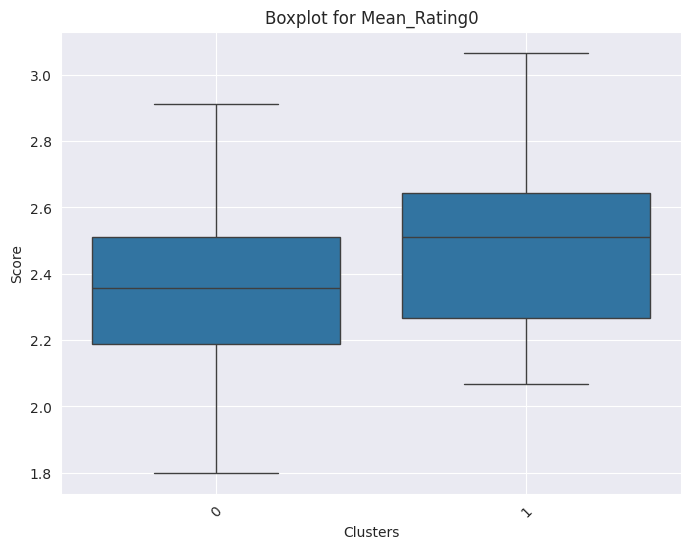

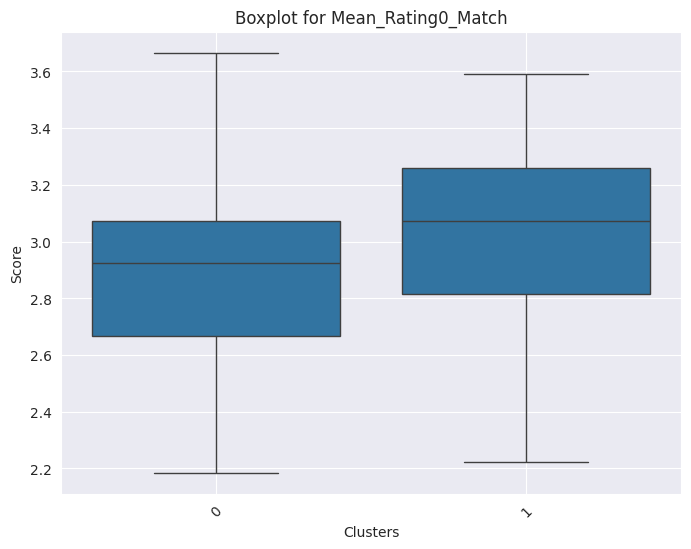

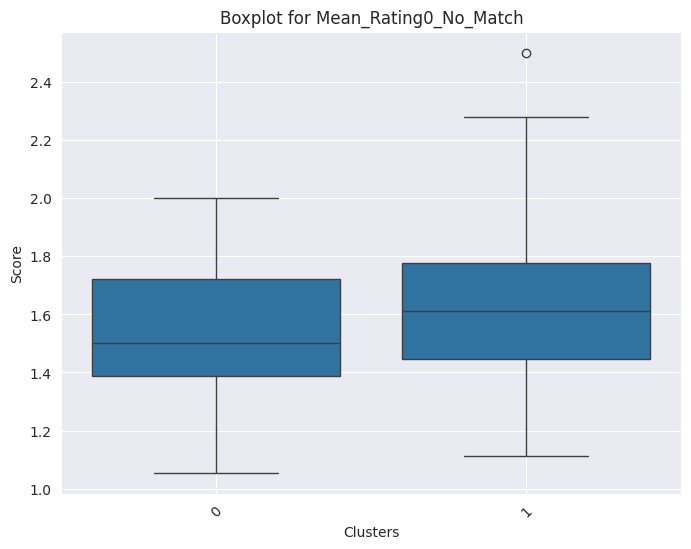

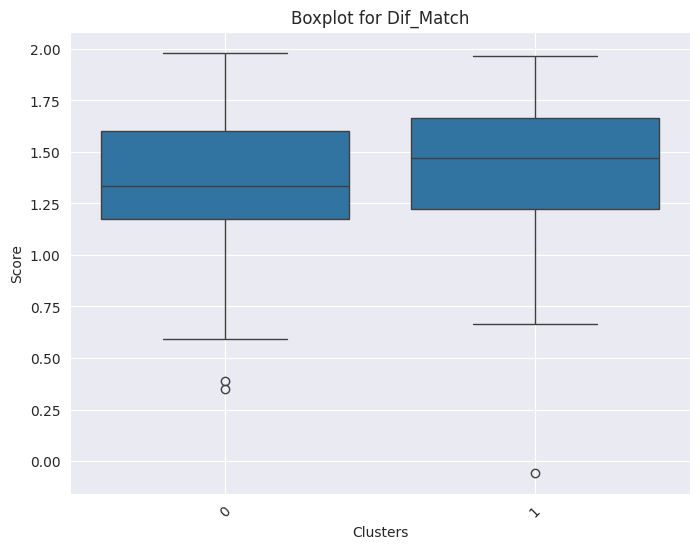

In [65]:
data_clusters = predictive_clustering.clustering(normalized_data,AgglomerativeClustering,{'n_clusters':2,'linkage':"complete"},fit=True)
cluster_result = feature_scales[clusters_features]
cluster_result["clusters"] = data_clusters
data = cluster_result[["PA", "UPPSP_PSV","Mean_Rating0","Mean_Rating0_Match","Mean_Rating0_No_Match","Dif_Match","clusters"]]

print(np.unique(data["clusters"],return_counts=True))

for feature in ["PA", "UPPSP_PSV","Mean_Rating0","Mean_Rating0_Match","Mean_Rating0_No_Match","Dif_Match"]:
    plt.figure(figsize=(8, 6))
    ax = plt.gca()
    sns.boxplot(x='clusters',y=feature, data= data, ax= ax)
    ax.set_title(f'Boxplot for {feature}')
    ax.set_xlabel('Clusters')
    ax.set_ylabel('Score')
    ax.grid(True)

    # Rotate x-tick labels for better readability
    plt.xticks(rotation=45)
    plt.show()



/tmp/ipykernel_9393/94797352.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_result["clusters"] = data_clusters


(array([0, 1, 2, 3]), array([52, 22, 23, 52]))


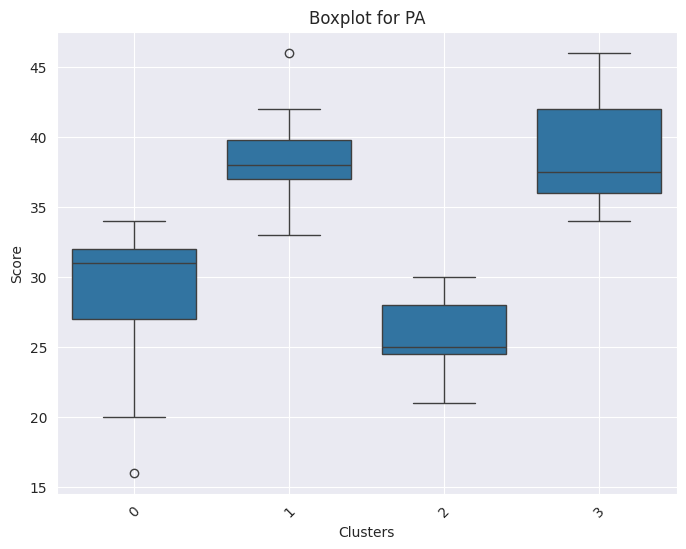

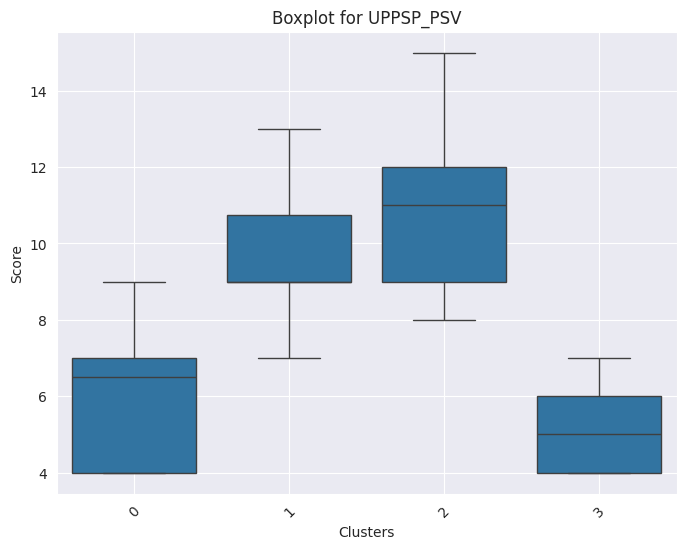

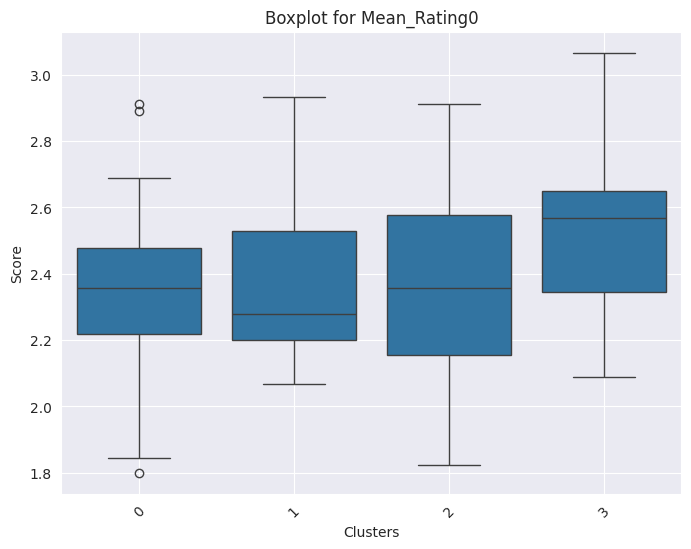

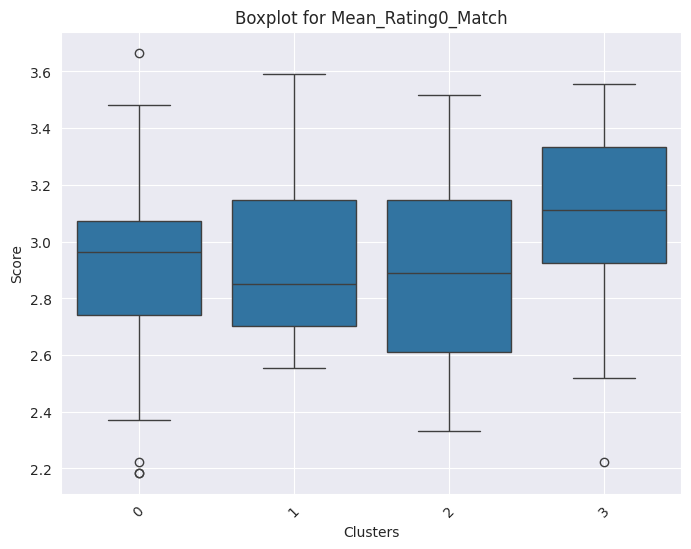

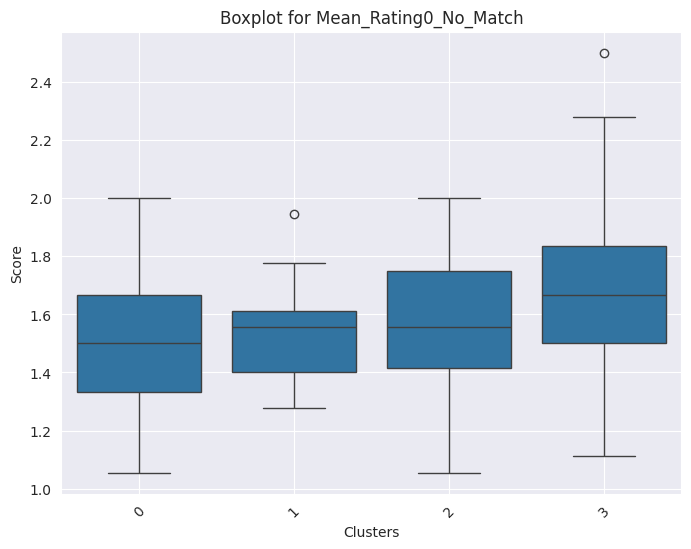

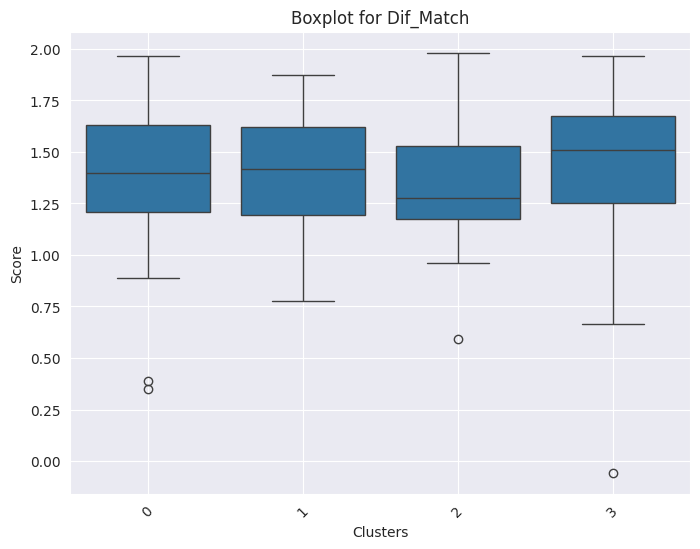

In [66]:
data_clusters = predictive_clustering.clustering(normalized_data,AgglomerativeClustering,{'n_clusters':4,'linkage':"complete"},fit=True)
cluster_result = feature_scales[clusters_features]
cluster_result["clusters"] = data_clusters
data = cluster_result[["PA", "UPPSP_PSV","Mean_Rating0","Mean_Rating0_Match","Mean_Rating0_No_Match","Dif_Match","clusters"]]

print(np.unique(data["clusters"],return_counts=True))

for feature in ["PA", "UPPSP_PSV","Mean_Rating0","Mean_Rating0_Match","Mean_Rating0_No_Match","Dif_Match"]:
    plt.figure(figsize=(8, 6))
    ax = plt.gca()
    sns.boxplot(x='clusters',y=feature, data= data, ax= ax)
    ax.set_title(f'Boxplot for {feature}')
    ax.set_xlabel('Clusters')
    ax.set_ylabel('Score')
    ax.grid(True)

    # Rotate x-tick labels for better readability
    plt.xticks(rotation=45)
    plt.show()

/tmp/ipykernel_9393/379096515.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_result["clusters"] = data_clusters


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), array([16, 16, 12, 20, 17,  7, 10, 19, 32]))


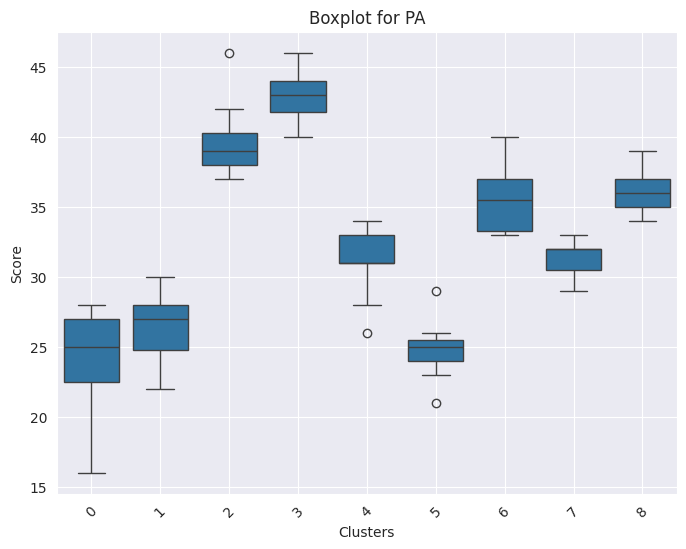

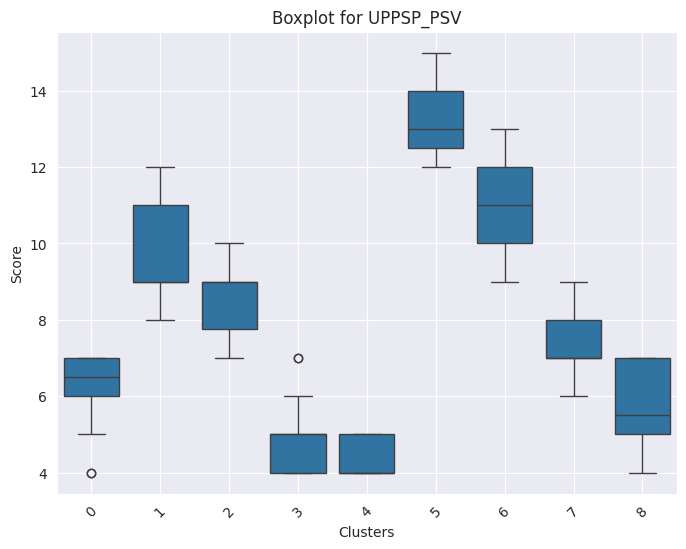

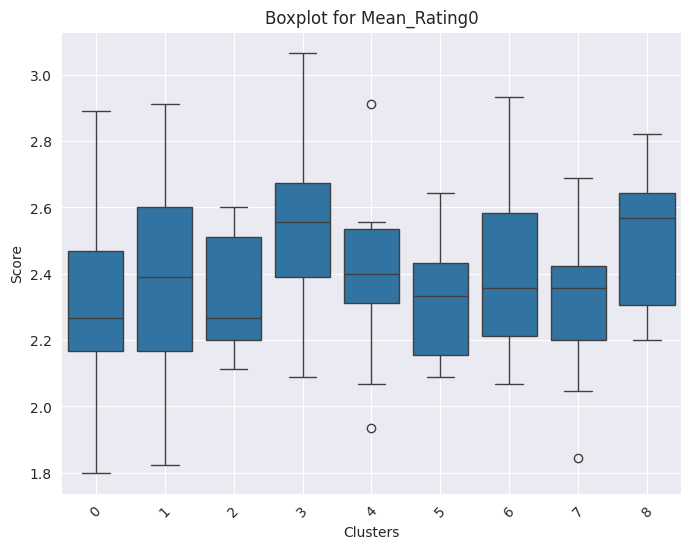

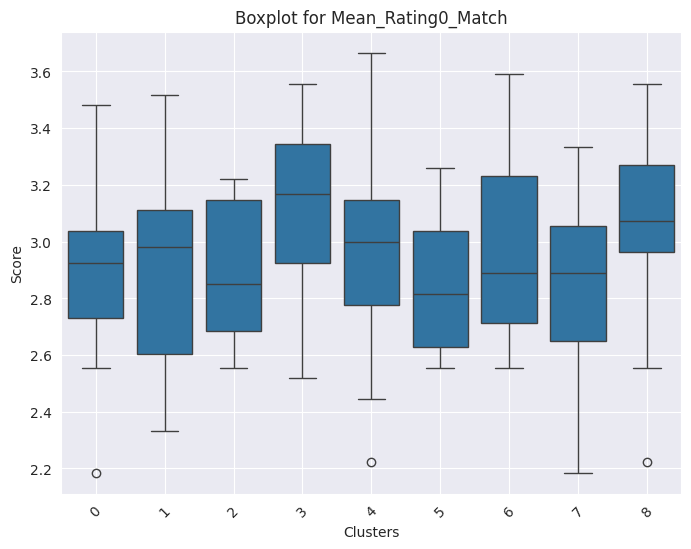

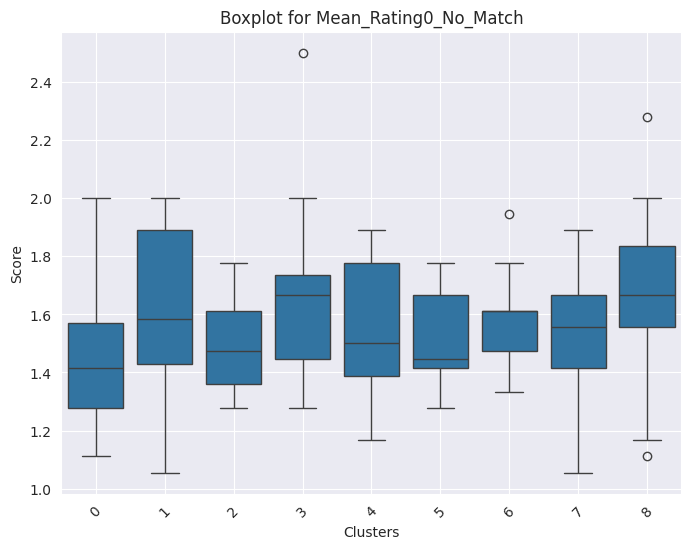

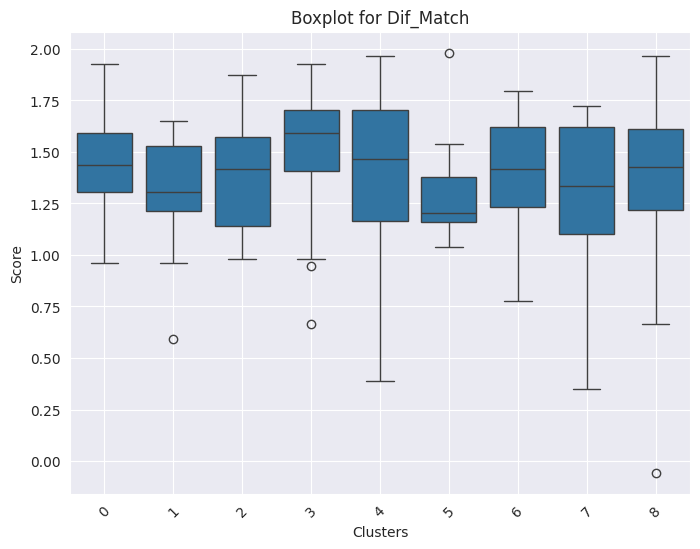

In [67]:
data_clusters = predictive_clustering.clustering(normalized_data,AgglomerativeClustering,{'n_clusters':9,'linkage':"complete"},fit=True)
cluster_result = feature_scales[clusters_features]
cluster_result["clusters"] = data_clusters
data = cluster_result[["PA", "UPPSP_PSV","Mean_Rating0","Mean_Rating0_Match","Mean_Rating0_No_Match","Dif_Match","clusters"]]

print(np.unique(data["clusters"],return_counts=True))

for feature in ["PA", "UPPSP_PSV","Mean_Rating0","Mean_Rating0_Match","Mean_Rating0_No_Match","Dif_Match"]:
    plt.figure(figsize=(8, 6))
    ax = plt.gca()
    sns.boxplot(x='clusters',y=feature, data= data, ax= ax)
    ax.set_title(f'Boxplot for {feature}')
    ax.set_xlabel('Clusters')
    ax.set_ylabel('Score')
    ax.grid(True)

    # Rotate x-tick labels for better readability
    plt.xticks(rotation=45)
    plt.show()